In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../input/jagan-ap/AP CM Jagan Mohan Reddy approves....jpg')
img.shape

(900, 1200, 3)

In [3]:
900*1200*3

3240000

In [4]:
# for img.data.tolist
# for x in img.data.tolist():
#   print(x)

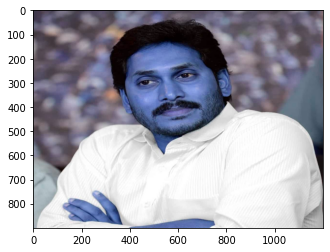

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

In [7]:
900*1200

1080000

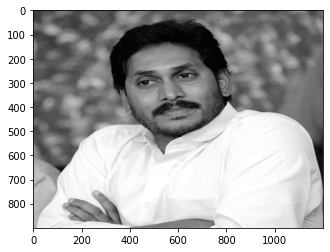

In [8]:
plt.imshow(gray,cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('../input/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../input/haar-cascades-for-face-detection/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
faces

array([[358, 121, 411, 411]], dtype=int32)

In [10]:
x,y,w,h = faces[0]
x,y,w,h

(358, 121, 411, 411)

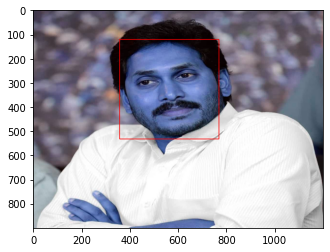

In [11]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(250,0,0),2)
plt.imshow(face_img)

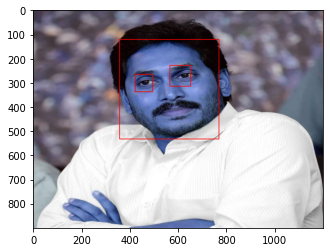

In [12]:
# cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(250,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(250,0,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

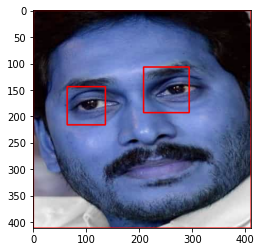

In [13]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

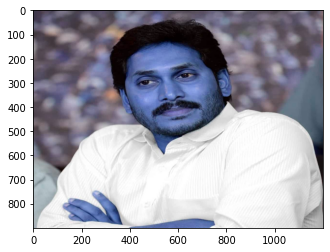

In [15]:
original_img = cv2.imread('../input/jagan-ap/AP CM Jagan Mohan Reddy approves....jpg')
plt.imshow(original_img)

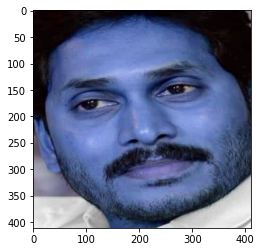

In [16]:
cropped_img = get_cropped_image_if_2_eyes('../input/jagan-ap/AP CM Jagan Mohan Reddy approves....jpg')
plt.imshow(cropped_img)

In [17]:
path_to_data = '../input/'
path_to_cr_data = '/kaggle/working/'


In [18]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [19]:
img_dirs.remove('../input/haar-cascades-for-face-detection')
img_dirs

['../input/narendra-modi',
 '../input/jagan-ap',
 '../input/revanth-ready',
 '../input/kcr-telangana']

In [20]:
from PIL import Image as im

In [21]:
# img = cv2.imread('../input/jagan-ap/AP CM Jagan Mohan Reddy approves....jpg')

# cv2.imwrite('/kaggle/working/augmented/image.jpg',img)

In [22]:
# os.mkdir('/kaggle/working/augmented/')

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            corpped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(corpped_folder):
                os.makedirs(corpped_folder)
                cropped_image_dirs.append(corpped_folder)
                print("generating cropped images in folder: ",corpped_folder)
                
            cropped_file_name = celebrity_name.split('-')[0] + str(count)+".jpg"
            print(cropped_file_name)
            cropped_file_path = corpped_folder +"/"+cropped_file_name
            print(cropped_file_path)
            
#             cv2.imwrite(cropped_file_path,roi_color)
#             im.fromarray(roi_color).save(cropped_file_path)
            cv2.imwrite(cropped_file_path,roi_color)
#             cv2.imwrite('image.jpg',img)

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

            count += 1

narendra-modi
generating cropped images in folder:  /kaggle/working/narendra-modi
narendra1.jpg
/kaggle/working/narendra-modi/narendra1.jpg
narendra2.jpg
/kaggle/working/narendra-modi/narendra2.jpg
narendra3.jpg
/kaggle/working/narendra-modi/narendra3.jpg
narendra4.jpg
/kaggle/working/narendra-modi/narendra4.jpg
narendra5.jpg
/kaggle/working/narendra-modi/narendra5.jpg
narendra6.jpg
/kaggle/working/narendra-modi/narendra6.jpg
narendra7.jpg
/kaggle/working/narendra-modi/narendra7.jpg
narendra8.jpg
/kaggle/working/narendra-modi/narendra8.jpg
narendra9.jpg
/kaggle/working/narendra-modi/narendra9.jpg
narendra10.jpg
/kaggle/working/narendra-modi/narendra10.jpg
narendra11.jpg
/kaggle/working/narendra-modi/narendra11.jpg
narendra12.jpg
/kaggle/working/narendra-modi/narendra12.jpg
narendra13.jpg
/kaggle/working/narendra-modi/narendra13.jpg
narendra14.jpg
/kaggle/working/narendra-modi/narendra14.jpg
narendra15.jpg
/kaggle/working/narendra-modi/narendra15.jpg
narendra16.jpg
/kaggle/working/naren

In [24]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    imArray = np.float32(imArray)
    imArray /= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    coeffs_H = pywt.waverec2(coeffs_H,mode)
    coeffs_H *= 255;
    coeffs_H = np.uint8(coeffs_H)
    
    return coeffs_H

In [25]:

celebrity_file_names_dict

{'narendra-modi': ['/kaggle/working/narendra-modi/narendra1.jpg',
  '/kaggle/working/narendra-modi/narendra2.jpg',
  '/kaggle/working/narendra-modi/narendra3.jpg',
  '/kaggle/working/narendra-modi/narendra4.jpg',
  '/kaggle/working/narendra-modi/narendra5.jpg',
  '/kaggle/working/narendra-modi/narendra6.jpg',
  '/kaggle/working/narendra-modi/narendra7.jpg',
  '/kaggle/working/narendra-modi/narendra8.jpg',
  '/kaggle/working/narendra-modi/narendra9.jpg',
  '/kaggle/working/narendra-modi/narendra10.jpg',
  '/kaggle/working/narendra-modi/narendra11.jpg',
  '/kaggle/working/narendra-modi/narendra12.jpg',
  '/kaggle/working/narendra-modi/narendra13.jpg',
  '/kaggle/working/narendra-modi/narendra14.jpg',
  '/kaggle/working/narendra-modi/narendra15.jpg',
  '/kaggle/working/narendra-modi/narendra16.jpg',
  '/kaggle/working/narendra-modi/narendra17.jpg',
  '/kaggle/working/narendra-modi/narendra18.jpg',
  '/kaggle/working/narendra-modi/narendra19.jpg',
  '/kaggle/working/narendra-modi/narendra2

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'narendra-modi': 0, 'jagan-ap': 1, 'revanth-ready': 2, 'kcr-telangana': 3}

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X)

294

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)

In [30]:
X.shape

(294, 4096)

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9054054054054054

In [33]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        20
           2       0.89      0.94      0.91        17
           3       0.92      0.88      0.90        25

    accuracy                           0.91        74
   macro avg       0.90      0.90      0.90        74
weighted avg       0.91      0.91      0.91        74



In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.859091,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.727273,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.881818,{'logisticregression__C': 5}


In [37]:
best_estimators['svm'].score(X_test,y_test)

0.8918918918918919

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.7837837837837838

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9054054054054054

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  1],
       [ 0, 20,  0,  0],
       [ 1,  1, 15,  0],
       [ 2,  1,  2, 20]])

Text(69.0, 0.5, 'Truth')

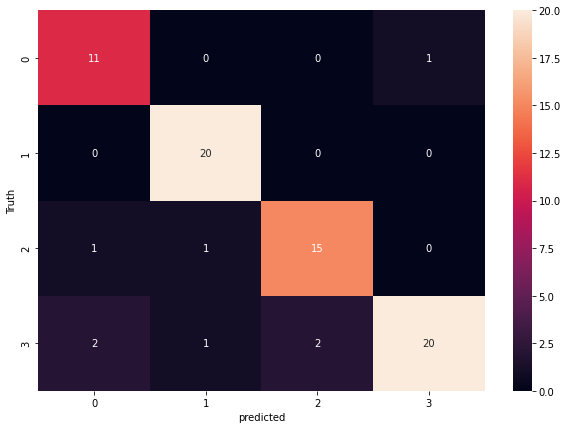

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'narendra-modi': 0, 'jagan-ap': 1, 'revanth-ready': 2, 'kcr-telangana': 3}

In [44]:
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))        